**Review**

Hi, my name is Dmitry and I will be reviewing your code.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  For your comments and questions.
</div>
  
First of all, thank you for turning in the project! You did a great job overall, but there is a small problem that needs to be fixed before the code is accepted. It should be pretty straightforward though! See below for details.

<div class="alert alert-success">
<b>Team lead's comment</b>
    
Hi Josefina! Thank you for submitting your work plan. You have a very detailed description of the steps which is great. Having prepared the data in a good way should help you to build a strong model. I answered your questions at the end of the notebook. 
You have done a good job preparing your work plan and it is accepted. Good luck with coding!
</div>

# Interconnect services - Telecom operator

# Contents <a id='back'></a>

* [Introduction](#intro)
* [Stage 1.Exploratory Data Analysis & Data Preprocessing](#data_review)

* [Stage 3. Work plan](#work_plan)


## Introduction <a id='intro'></a>


The telecom operator Interconnect would like to be able to forecast their churn of clients. If it's discovered that a user is planning to leave, they will be offered promotional codes and special plan options. Interconnect's marketing team has collected some of their clientele's personal data, including information about their plans and contracts.


### Interconnect's services

Interconnect mainly provides two types of services:

1. Landline communication. The telephone can be connected to several lines simultaneously.
2. Internet. The network can be set up via a telephone line (DSL, *digital subscriber line*) or through a fiber optic cable.

Some other services the company provides include:

- Internet security: antivirus software (*DeviceProtection*) and a malicious website blocker (*OnlineSecurity*)
- A dedicated technical support line (*TechSupport*)
- Cloud file storage and data backup (*OnlineBackup*)
- TV streaming (*StreamingTV*) and a movie directory (*StreamingMovies*)

The clients can choose either a monthly payment or sign a 1- or 2-year contract. They can use various payment methods and receive an electronic invoice after a transaction.

### Data Description

The data consists of files obtained from different sources:

- `contract.csv` — contract information
- `personal.csv` — the client's personal data
- `internet.csv` — information about Internet services
- `phone.csv` — information about telephone services

In each file, the column `customerID` contains a unique code assigned to each client.

The contract information is valid as of February 1, 2020.

## Stage 1. Data overview <a id='data_review'></a>

Open the datasets thas Interconnect has collected and study them.

As we move on, we will advance with data pre-processing as well, performing any fixes that may be appropriate.


In [1]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Loading all the libraries

import pandas as pd
import numpy as np

import datetime

import re

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OrdinalEncoder 

from sklearn.metrics import roc_auc_score 
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as imbpipeline

In [3]:
# Load the data files separate DataFrames

#Contracts
try:
    ctt_df=pd.read_csv('c:/Users/josef/Practicum/Final Project 1/contract.csv')
except:
    ctt_df=pd.read_csv('/datasets/final_provider/contract.csv')

    
#Personal data
try:
    pers_df=pd.read_csv('c:/Users/josef/Practicum/Final Project 1/personal.csv')
except:
    pers_df=pd.read_csv('/datasets/final_provider/personal.csv')    
    
    
#Internet services

try:
    int_df=pd.read_csv('c:/Users/josef/Practicum/Final Project 1/internet.csv')
except:
    int_df=pd.read_csv('/datasets/final_provider/internet.csv')    
    

#Telephone services
try:
    phone_df=pd.read_csv('c:/Users/josef/Practicum/Final Project 1/phone.csv')
except:
    phone_df=pd.read_csv('/datasets/final_provider/phone.csv')    
    

In [4]:
def explore_df (df):
    print('Top five rows:')
    display(df.head())
    print('\n')
    
    print('Five random samples:')
    display(df.sample(5))
    print('\n')
    
    print('Last five rows:')
    display(df.tail())
    print('\n')
    
    print('Info and dtypes:')
    display(df.info())
    print('\n')
    
    print('Missing values %:')
    display(df.isna().sum()/len(df)*100)
    print('\n')
    
    print('Duplicates:')
    display(df.duplicated().sum())
    print('\n')

### Contracts 

In [5]:
#Overview of contracts df
explore_df(ctt_df)

Top five rows:


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65




Five random samples:


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
834,9231-ZJYAM,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,78.85,292.8
3383,8185-UPYBR,2019-05-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,75.50,438
4510,6368-NWMCE,2016-12-01,No,Month-to-month,No,Credit card (automatic),68.15,2656.3
6001,4367-NHWMM,2020-01-01,No,Month-to-month,Yes,Mailed check,24.90,24.9
5227,4060-LDNLU,2019-07-01,No,Month-to-month,No,Electronic check,96.20,639.7




Last five rows:


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6
7042,3186-AJIEK,2014-08-01,No,Two year,Yes,Bank transfer (automatic),105.65,6844.5




Info and dtypes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


None



Missing values %:


customerID          0.0
BeginDate           0.0
EndDate             0.0
Type                0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
dtype: float64



Duplicates:


0

In [6]:
#count values in type column
ctt_df['Type'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Type, dtype: int64

In [7]:
#count values in paperless billing column
ctt_df['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [8]:
#count values in payment method column
ctt_df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [9]:
#check if customer IDs are repeated
ctt_df['customerID'].nunique()-len(ctt_df)

0

Regarding contracts dataframe, we will perform the following tweaks/fixes:
    
- `contract.csv` — contract information
    - Convert column headers to snake_case.
    - Begin date: convert from object to datetime.
    - Add ``churn`` column : 0 if end date is = "No" or 1 otherwise.
    - End date: replace "No" by 2020-02-01 (the date at which the contracts are valid), and convert to datetime.
  
    - Type: Contract type is an ordinal categorical column, in the sense that it has an inherent order: the shortest the term, the more likely the customer is to leave soon. As our target value will be 1 if the customer is likely to be about to leave, and 0 otherwise, we will replace "Month-to-Month" by 3, "One year" by 2 and "Two year" by 1 to follow the same order provided that we're able to verify our hypothesis throughout the existing data.
    - PaperlessBilling: replace "Yes" by 1 and "No" by 0
    - Payment method: intuitively, we can guess that people who pay by automatic means is less likely to unsuscribe than the ones who send a check monthly. For such reason, we will add a new column named "automatic" set to 1 if payment method contains such word, and to 0 if it doesn't, and then remove it from payment method. Then we'll assess how each payment method correlates to churn.
   
    - Total charges: convert to float





#### Headers to snake_case 

In [10]:
#function to rename columns
def rename_col(df):
    df= df.rename(columns={'customerID': 'customerId'})
    col_replc= {}
    
    for col in df.columns:
        col=col.replace('ID','Id')
        new_col= '_'.join(re.sub( r"([A-Z])", r" \1", col).split()).lower()
        col_replc[col]=new_col
        
    df.rename(columns=col_replc,inplace=True)
    return df


In [11]:
#rename contract columns
ctt_df=rename_col(ctt_df)
ctt_df

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6


#### Begin date to datetime

In [12]:
#convert begin date to datetime
ctt_df['begin_date']= pd.to_datetime(ctt_df['begin_date'], format= '%Y-%m-%d') 

#check conversion
ctt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   object        
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 440.3+ KB


#### Add churn column

In [13]:
#check that end date is always prior to 2020-02-14
ctt_df['end_date'].value_counts()

No                     5174
2019-11-01 00:00:00     485
2019-12-01 00:00:00     466
2020-01-01 00:00:00     460
2019-10-01 00:00:00     458
Name: end_date, dtype: int64

In [14]:
#add churn column (true if client has an end date, and false otherwise)
ctt_df['churn'] = ctt_df['end_date'].apply(lambda x: 0 if x=='No' else 1)
ctt_df['churn'].value_counts()

0    5174
1    1869
Name: churn, dtype: int64

####  End date: replace "No" by 2020-02-01 (the date at which the contracts are valid), and convert to datetime

In [15]:
#replace no by date at which the data is valid
ctt_df['end_date']= ctt_df['end_date'].replace('No','2020-02-01 00:00:00')
ctt_df['end_date'].value_counts()

2020-02-01 00:00:00    5174
2019-11-01 00:00:00     485
2019-12-01 00:00:00     466
2020-01-01 00:00:00     460
2019-10-01 00:00:00     458
Name: end_date, dtype: int64

In [16]:
#convert to datetime
ctt_df['end_date']= pd.to_datetime(ctt_df['end_date'], format= '%Y-%m-%d')

#check conversion
ctt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   object        
 8   churn              7043 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(1), object(5)
memory usage: 495.3+ KB


In [17]:
#create a df with count of users by plan
clients_by_plan= pd.DataFrame(ctt_df['type'].value_counts())
clients_by_plan.reset_index(inplace=True)
clients_by_plan

,index,type
0,Month-to-month,3875
1,Two year,1695
2,One year,1473


In [18]:
#create a df with % of people who churned/did not churn by plan type
churn_by_type= pd.DataFrame(ctt_df.groupby('type')['churn'].value_counts())
churn_by_type=churn_by_type.rename(columns={'churn':'churn_count'})
churn_by_type.reset_index(inplace=True)
churn_by_type['churn_%'] = churn_by_type.apply(lambda x: round(x['churn_count']/clients_by_plan[clients_by_plan['index']==x['type']]['type'].values[0]*100,2) , axis=1)
churn_by_type ['churn_type']= churn_by_type.apply(lambda x: x['type'] + ' ' + str(x['churn']),axis=1)
churn_by_type

,type,churn,churn_count,churn_%,churn_type
0,Month-to-month,0,2220,57.29,Month-to-month 0
1,Month-to-month,1,1655,42.71,Month-to-month 1
2,One year,0,1307,88.73,One year 0
3,One year,1,166,11.27,One year 1
4,Two year,0,1647,97.17,Two year 0
5,Two year,1,48,2.83,Two year 1


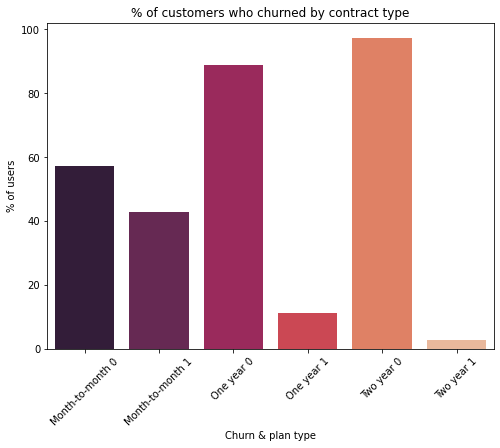

In [19]:
#plot % of clients who resigned the contract by plan type
plt.figure(figsize=(8,6))
sns.barplot(x='churn_type', y= 'churn_%', data= churn_by_type, palette="rocket")

plt.xticks(rotation=45)
plt.title('% of customers who churned by contract type')
plt.xlabel('Churn & plan type')
plt.ylabel('% of users')
plt.show()

In the chart above, we can see that the briefer the contract type is, the higher the percentage of users who churned. Hence, we can proceed to encode the values as planned.

In [20]:
#replace month-to-month by 3, one year by 2 and two year by 3
ctt_df['type'] = ctt_df['type'].apply(lambda x: 3 if x=='Month-to-month' else (2 if x=='One year' else 1))
ctt_df.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,7590-VHVEG,2020-01-01,2020-02-01,3,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,2017-04-01,2020-02-01,2,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,2019-10-01,2019-12-01,3,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,2016-05-01,2020-02-01,2,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,2019-09-01,2019-11-01,3,Yes,Electronic check,70.70,151.65,1


#### PaperlessBilling: replace "Yes" by 1 and "No" by 0

In [21]:
#change paperless billing to binary
ctt_df['paperless_billing']=ctt_df['paperless_billing'].apply(lambda x: 1 if x=='Yes' else 0)
ctt_df.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,7590-VHVEG,2020-01-01,2020-02-01,3,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,2017-04-01,2020-02-01,2,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,2019-10-01,2019-12-01,3,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,2016-05-01,2020-02-01,2,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,2019-09-01,2019-11-01,3,1,Electronic check,70.70,151.65,1


In [22]:
#create a df with count of users by plan
clients_by_plan= pd.DataFrame(ctt_df['type'].value_counts())
clients_by_plan.reset_index(inplace=True)
clients_by_plan

,index,type
0,3,3875
1,1,1695
2,2,1473


#### Add column specifying if the payment method is automatic or not

In [23]:
#add automatic_payment column
ctt_df['automatic_payment'] = ctt_df['payment_method'].apply(lambda x: 1 if 'automatic' in x else 0)
ctt_df.sample(5)

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,churn,automatic_payment
1074,2111-DWYHN,2020-01-01,2020-02-01,3,0,Mailed check,21.1,21.1,0,0
2342,1552-AAGRX,2017-08-01,2020-02-01,3,0,Bank transfer (automatic),106.4,3211.9,0,1
6263,8409-WQJUX,2018-01-01,2020-02-01,2,0,Electronic check,54.2,1423.15,0,0
4553,5914-XRFQB,2014-02-01,2020-02-01,1,1,Bank transfer (automatic),115.8,8424.9,0,1
5650,6047-SUHPR,2016-11-01,2020-02-01,2,0,Electronic check,59.8,2343.85,0,0


#### Remove the automatic condition specification from payment method and study the churn distribution by each of them

In [24]:
#remove the automatic description from payment method
ctt_df['payment_method']= ctt_df['payment_method'].apply(lambda x:  re.sub("[\(\[].*?[\)\]]", "", x))
ctt_df.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,churn,automatic_payment
0,7590-VHVEG,2020-01-01,2020-02-01,3,1,Electronic check,29.85,29.85,0,0
1,5575-GNVDE,2017-04-01,2020-02-01,2,0,Mailed check,56.95,1889.5,0,0
2,3668-QPYBK,2019-10-01,2019-12-01,3,1,Mailed check,53.85,108.15,1,0
3,7795-CFOCW,2016-05-01,2020-02-01,2,0,Bank transfer,42.30,1840.75,0,1
4,9237-HQITU,2019-09-01,2019-11-01,3,1,Electronic check,70.70,151.65,1,0


#### Analyze distribution of clients who churned by payment method

In [25]:
#create a df with count of users by plan
clients_by_pmethod= pd.DataFrame(ctt_df['payment_method'].value_counts())
clients_by_pmethod.reset_index(inplace=True)
clients_by_pmethod

,index,payment_method
0,Electronic check,2365
1,Mailed check,1612
2,Bank transfer,1544
3,Credit card,1522


In [26]:
#create a df with % of people who churned/did not churn by plan type
churn_by_pmethod= pd.DataFrame(ctt_df.groupby('payment_method')['churn'].value_counts())
churn_by_pmethod=churn_by_pmethod.rename(columns={'churn':'churn_count'})
churn_by_pmethod.reset_index(inplace=True)
churn_by_pmethod['churn_%'] = churn_by_pmethod.apply(lambda x: round(x['churn_count']/clients_by_pmethod[clients_by_pmethod['index']==x['payment_method']]['payment_method'].values[0]*100,2) , axis=1)
churn_by_pmethod ['churn_pmethod']= churn_by_pmethod.apply(lambda x: x['payment_method'] + ' ' + str(x['churn']),axis=1)
churn_by_pmethod

,payment_method,churn,churn_count,churn_%,churn_pmethod
0,Bank transfer,0,1286,83.29,Bank transfer 0
1,Bank transfer,1,258,16.71,Bank transfer 1
2,Credit card,0,1290,84.76,Credit card 0
3,Credit card,1,232,15.24,Credit card 1
4,Electronic check,0,1294,54.71,Electronic check 0
5,Electronic check,1,1071,45.29,Electronic check 1
6,Mailed check,0,1304,80.89,Mailed check 0
7,Mailed check,1,308,19.11,Mailed check 1


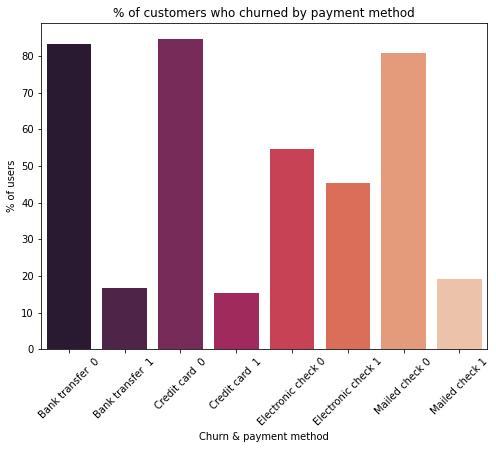

In [27]:
#plot % of clients who resigned the contract by plan type
plt.figure(figsize=(8,6))
sns.barplot(x='churn_pmethod', y= 'churn_%', data= churn_by_pmethod, palette="rocket")

plt.xticks(rotation=45)
plt.title('% of customers who churned by payment method')
plt.xlabel('Churn & payment method')
plt.ylabel('% of users')
plt.show()

In the case of payment methods, there's no clear pattern that allows to classify them as an ordinal variable. Hence, we will use label encoding or One-hot encoding as appropiate for each particular model that we train later on.

#### Total charges: convert to float

When trying to convert this figures to float, we came across a bug in the values recorded, since some clients who churned the same day of suscription had a white space instead of 0. First we will replace that value by 0, and then convert the column to float.

In [28]:
#print rows where total charges is blank
ctt_df[ctt_df['total_charges']==' ']

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,churn,automatic_payment
488,4472-LVYGI,2020-02-01,2020-02-01,1,1,Bank transfer,52.55,,0,1
753,3115-CZMZD,2020-02-01,2020-02-01,1,0,Mailed check,20.25,,0,0
936,5709-LVOEQ,2020-02-01,2020-02-01,1,0,Mailed check,80.85,,0,0
1082,4367-NUYAO,2020-02-01,2020-02-01,1,0,Mailed check,25.75,,0,0
1340,1371-DWPAZ,2020-02-01,2020-02-01,1,0,Credit card,56.05,,0,1
3331,7644-OMVMY,2020-02-01,2020-02-01,1,0,Mailed check,19.85,,0,0
3826,3213-VVOLG,2020-02-01,2020-02-01,1,0,Mailed check,25.35,,0,0
4380,2520-SGTTA,2020-02-01,2020-02-01,1,0,Mailed check,20.00,,0,0
5218,2923-ARZLG,2020-02-01,2020-02-01,2,1,Mailed check,19.70,,0,0
6670,4075-WKNIU,2020-02-01,2020-02-01,1,0,Mailed check,73.35,,0,0


In [29]:
#Replace by 0
ctt_df['total_charges']=ctt_df['total_charges'].replace(' ',0)

#change to float
ctt_df['total_charges']=ctt_df['total_charges'].astype('float')

#check result
ctt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   datetime64[ns]
 3   type               7043 non-null   int64         
 4   paperless_billing  7043 non-null   int64         
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   float64       
 8   churn              7043 non-null   int64         
 9   automatic_payment  7043 non-null   int64         
dtypes: datetime64[ns](2), float64(2), int64(4), object(2)
memory usage: 550.4+ KB


### Personal data

In [30]:
#Overview of personal data df
explore_df(pers_df)

Top five rows:


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No




Five random samples:


,customerID,gender,SeniorCitizen,Partner,Dependents
1841,8958-JPTRR,Female,0,Yes,No
6585,4955-VCWBI,Female,0,Yes,Yes
2034,9720-JJJOR,Male,0,Yes,Yes
4407,1850-AKQEP,Male,0,No,Yes
6079,9881-VCZEP,Female,0,Yes,No




Last five rows:


,customerID,gender,SeniorCitizen,Partner,Dependents
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No
7042,3186-AJIEK,Male,0,No,No




Info and dtypes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


None



Missing values %:


customerID       0.0
gender           0.0
SeniorCitizen    0.0
Partner          0.0
Dependents       0.0
dtype: float64



Duplicates:


0

In [31]:
#check gender unique values
pers_df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [32]:
#check senior citizen unique values
pers_df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [33]:
#check partner unique values
pers_df['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [34]:
#check dependents unique values
pers_df['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

The dataframe containing client's personal data does not have missing or duplicated values that need to be fixed.

However, the following workarounds will be applied to it:
    
- `pers.csv` — customers' personal information
    - Convert column headers to snake_case.
    - Change gender column by "Female", and set values to 1 (True) or 0 (False)
 
    - In 'Partners' and 'Dependents' change "Yes" by 1 and "No" by 0





#### Convert column headers to snake_case

In [35]:
#rename personal data columns
pers_df=rename_col(pers_df)

#check replacement
pers_df.head()

,customer_id,gender,senior_citizen,partner,dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


#### Change gender column by "Female", and set values to 1 (True) or 0 (False)

In [36]:
#Change gender column name by female
pers_df=pers_df.rename(columns={'gender':'female'})

#set female values to true or false
pers_df['female']=pers_df['female'].replace('Female',1).replace('Male',0)

#check first five rows
pers_df.head()

,customer_id,female,senior_citizen,partner,dependents
0,7590-VHVEG,1,0,Yes,No
1,5575-GNVDE,0,0,No,No
2,3668-QPYBK,0,0,No,No
3,7795-CFOCW,0,0,No,No
4,9237-HQITU,1,0,No,No


#### In 'Partners' and 'Dependents' change "Yes" by 1 and "No" by 0

In [37]:
#set values to true or false
pers_df['partner']=pers_df['partner'].replace('Yes',1).replace('No',0)
pers_df['dependents']=pers_df['dependents'].replace('Yes',1).replace('No',0)

pers_df.head()

,customer_id,female,senior_citizen,partner,dependents
0,7590-VHVEG,1,0,1,0
1,5575-GNVDE,0,0,0,0
2,3668-QPYBK,0,0,0,0
3,7795-CFOCW,0,0,0,0
4,9237-HQITU,1,0,0,0


In [38]:
#check dtypes
pers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     7043 non-null   object
 1   female          7043 non-null   int64 
 2   senior_citizen  7043 non-null   int64 
 3   partner         7043 non-null   int64 
 4   dependents      7043 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 275.2+ KB


### Internet services

In [39]:
#Overview of internet df
explore_df(int_df)

Top five rows:


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No




Five random samples:


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
1786,0093-EXYQL,Fiber optic,No,No,No,No,Yes,Yes
2493,3745-HRPHI,DSL,No,No,Yes,Yes,Yes,Yes
1989,4277-PVRAN,Fiber optic,No,No,No,No,Yes,No
1178,9242-TKFSV,DSL,Yes,Yes,Yes,Yes,Yes,Yes
1934,1475-VWVDO,Fiber optic,No,No,Yes,No,No,No




Last five rows:


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
5512,6840-RESVB,DSL,Yes,No,Yes,Yes,Yes,Yes
5513,2234-XADUH,Fiber optic,No,Yes,Yes,No,Yes,Yes
5514,4801-JZAZL,DSL,Yes,No,No,No,No,No
5515,8361-LTMKD,Fiber optic,No,No,No,No,No,No
5516,3186-AJIEK,Fiber optic,Yes,No,Yes,Yes,Yes,Yes




Info and dtypes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


None



Missing values %:


customerID          0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
dtype: float64



Duplicates:


0

In [40]:
#count unique values in internet services
int_df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
Name: InternetService, dtype: int64

There are no missing or duplicated values in the dataframe containing internet data.


Nonetheless, these changes need to be put in place:
    
- `internet.csv` — Internet information
    - Convert column headers to snake_case.
    - Change InternetService column by "fiber_optic", and set values to 1 (True) or 0 (False)
  
    - In every other column, change "Yes" by 1 and "No" by 0





#### Convert column headers to snake_case

In [41]:
#rename personal data columns
int_df=rename_col(int_df)

#check replacement
int_df.head()

,customer_id,internet_service,online_security,online_backup,device_protection,tech_support,streaming_t_v,streaming_movies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [42]:
#correct streaming tv format
int_df=int_df.rename(columns={'streaming_t_v': 'streaming_tv'})

#check replacement
int_df.head()

,customer_id,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


#### Change InternetService column by "fiber_optic", and set values to 1 (True) or 0 (False)

In [43]:
#Change internet service column name by fiber_optic
int_df=int_df.rename(columns={'internet_service':'fiber_optic'})

#set fiber_optic values to true or false
int_df['fiber_optic']=int_df['fiber_optic'].replace('Fiber optic',1).replace('DSL',0)

#check first five rows
int_df.head()

,customer_id,fiber_optic,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
0,7590-VHVEG,0,No,Yes,No,No,No,No
1,5575-GNVDE,0,Yes,No,Yes,No,No,No
2,3668-QPYBK,0,Yes,Yes,No,No,No,No
3,7795-CFOCW,0,Yes,No,Yes,Yes,No,No
4,9237-HQITU,1,No,No,No,No,No,No


#### In every other column, change "Yes" by 1 and "No" by 0

In [44]:
#replace yes by 1 and no by 0
int_df.loc[:,'online_security':'streaming_movies']=int_df.loc[:,'online_security':'streaming_movies'].replace('Yes',1).replace('No',0)

#check result
int_df.head()

,customer_id,fiber_optic,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
0,7590-VHVEG,0,0,1,0,0,0,0
1,5575-GNVDE,0,1,0,1,0,0,0
2,3668-QPYBK,0,1,1,0,0,0,0
3,7795-CFOCW,0,1,0,1,1,0,0
4,9237-HQITU,1,0,0,0,0,0,0


In [45]:
#check dtypes
int_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        5517 non-null   object
 1   fiber_optic        5517 non-null   int64 
 2   online_security    5517 non-null   int64 
 3   online_backup      5517 non-null   int64 
 4   device_protection  5517 non-null   int64 
 5   tech_support       5517 non-null   int64 
 6   streaming_tv       5517 non-null   int64 
 7   streaming_movies   5517 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 344.9+ KB


### Phone 

In [46]:
#Overview of phone df
explore_df(phone_df)

Top five rows:


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes




Five random samples:


,customerID,MultipleLines
2504,3948-KXDUF,Yes
5465,2887-JPYLU,No
1245,9793-WECQC,No
4538,5600-PDUJF,No
392,5628-RKIFK,Yes




Last five rows:


,customerID,MultipleLines
6356,2569-WGERO,No
6357,6840-RESVB,Yes
6358,2234-XADUH,Yes
6359,8361-LTMKD,Yes
6360,3186-AJIEK,No




Info and dtypes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


None



Missing values %:


customerID       0.0
MultipleLines    0.0
dtype: float64



Duplicates:


0

The dataframe containing phone data is complete, but we need to fix the following:

    - Convert column headers to snake_case.
   
    - In 'MultipleLines' "Yes" by 1 and "No" by 0
    





In [47]:
#rename phone columns
phone_df=rename_col(phone_df)

#check replacement
phone_df.head()

,customer_id,multiple_lines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [48]:
#set multiple lines values to true or false
phone_df['multiple_lines']=phone_df['multiple_lines'].replace('Yes',1).replace('No',0)

#check result
phone_df.head()

,customer_id,multiple_lines
0,5575-GNVDE,0
1,3668-QPYBK,0
2,9237-HQITU,0
3,9305-CDSKC,1
4,1452-KIOVK,1


### Conclusions

Even though all the datasets are complete (no missing values) and there aren't any duplicated rows on them, we must flag the issue that both internet and phone datasets have less rows than contracts and personal data tables. This means that such information is missing for some customers.


We will proceed to merge them by customer ID and assess how to fill out missing data.

### Merging DataFrames

In [49]:
#merge contracts df and personal df
df= ctt_df.merge(pers_df, right_on='customer_id', left_on='customer_id', how='outer')


In [50]:
#check for missing values
df.isna().sum()

customer_id          0
begin_date           0
end_date             0
type                 0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
churn                0
automatic_payment    0
female               0
senior_citizen       0
partner              0
dependents           0
dtype: int64

All the customer IDs included in each dataset were matched

In [51]:
#merge internet df
df= df.merge(int_df, right_on='customer_id', left_on='customer_id', how='outer')
df
df.columns

Index(['customer_id', 'begin_date', 'end_date', 'type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'churn',
       'automatic_payment', 'female', 'senior_citizen', 'partner',
       'dependents', 'fiber_optic', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies'],
      dtype='object')

In [52]:
#calculate % of missing values
round(df.isna().sum()/len(df)*100,2)

customer_id           0.00
begin_date            0.00
end_date              0.00
type                  0.00
paperless_billing     0.00
payment_method        0.00
monthly_charges       0.00
total_charges         0.00
churn                 0.00
automatic_payment     0.00
female                0.00
senior_citizen        0.00
partner               0.00
dependents            0.00
fiber_optic          21.67
online_security      21.67
online_backup        21.67
device_protection    21.67
tech_support         21.67
streaming_tv         21.67
streaming_movies     21.67
dtype: float64

The 22% of the values relating to internet plan information are missing and need to be filled out, as it's too large a percentage as to drop out the rows.

For filling missing values, we will proceed to set them as -1 (bear in mind that we are only dealing with binary columns) to indicate that the user did not have any internet plan hired, as we assume such is the reason for them not to be in place.


In [53]:
#fill missing values with -1

for col in df.loc[:,'fiber_optic':].columns:
    df[col]= df[col].fillna(-1)

In [54]:
#check fulfillment
df.isna().sum()

customer_id          0
begin_date           0
end_date             0
type                 0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
churn                0
automatic_payment    0
female               0
senior_citizen       0
partner              0
dependents           0
fiber_optic          0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
dtype: int64

In [55]:
#merge phone df
df=df.merge(phone_df, right_on='customer_id', left_on='customer_id', how='outer')
#calculate % of missing values
round(df.isna().sum()/len(df)*100,2)

customer_id          0.00
begin_date           0.00
end_date             0.00
type                 0.00
paperless_billing    0.00
payment_method       0.00
monthly_charges      0.00
total_charges        0.00
churn                0.00
automatic_payment    0.00
female               0.00
senior_citizen       0.00
partner              0.00
dependents           0.00
fiber_optic          0.00
online_security      0.00
online_backup        0.00
device_protection    0.00
tech_support         0.00
streaming_tv         0.00
streaming_movies     0.00
multiple_lines       9.68
dtype: float64

An extra 10% of the values relating to phone services information are missing, and will apply the same workaround as above to fix them.

In [56]:
#apply function to column with missing values
df['multiple_lines']= df['multiple_lines'].fillna(-1)


#check fulfillment
df.isna().sum()

customer_id          0
begin_date           0
end_date             0
type                 0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
churn                0
automatic_payment    0
female               0
senior_citizen       0
partner              0
dependents           0
fiber_optic          0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
multiple_lines       0
dtype: int64

The final tweak will consist of splitting begin_date into day_suscribed and year_suscribed to make it suitable for model processing, and convert binary columns to integer.

Also, we'll drop out customer_ID, end_date and begin_date as they're not useful anymore.


In [57]:
#add a column with month and year of suscription
df['month_suscribed']= df['begin_date'].apply(lambda x: x.month)
df['year_suscribed']= df['begin_date'].apply(lambda x: x.year)

df.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,churn,automatic_payment,...,fiber_optic,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,month_suscribed,year_suscribed
0,7590-VHVEG,2020-01-01,2020-02-01,3,1,Electronic check,29.85,29.85,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,1,2020
1,5575-GNVDE,2017-04-01,2020-02-01,2,0,Mailed check,56.95,1889.50,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4,2017
2,3668-QPYBK,2019-10-01,2019-12-01,3,1,Mailed check,53.85,108.15,1,0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,10,2019
3,7795-CFOCW,2016-05-01,2020-02-01,2,0,Bank transfer,42.30,1840.75,0,1,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,-1.0,5,2016
4,9237-HQITU,2019-09-01,2019-11-01,3,1,Electronic check,70.70,151.65,1,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,2019


In [58]:
#drop customer ID
df=df.drop(['customer_id','end_date','begin_date'], axis=1)
df.head()

,type,paperless_billing,payment_method,monthly_charges,total_charges,churn,automatic_payment,female,senior_citizen,partner,...,fiber_optic,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,month_suscribed,year_suscribed
0,3,1,Electronic check,29.85,29.85,0,0,1,0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,1,2020
1,2,0,Mailed check,56.95,1889.50,0,0,0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4,2017
2,3,1,Mailed check,53.85,108.15,1,0,0,0,0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,10,2019
3,2,0,Bank transfer,42.30,1840.75,0,1,0,0,0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,-1.0,5,2016
4,3,1,Electronic check,70.70,151.65,1,0,1,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,2019


In [59]:
#convert binary columns to int

for col in df.loc[:,'fiber_optic':]:
    df[col]=df[col].astype('int')

#check result
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type               7043 non-null   int64  
 1   paperless_billing  7043 non-null   int64  
 2   payment_method     7043 non-null   object 
 3   monthly_charges    7043 non-null   float64
 4   total_charges      7043 non-null   float64
 5   churn              7043 non-null   int64  
 6   automatic_payment  7043 non-null   int64  
 7   female             7043 non-null   int64  
 8   senior_citizen     7043 non-null   int64  
 9   partner            7043 non-null   int64  
 10  dependents         7043 non-null   int64  
 11  fiber_optic        7043 non-null   int32  
 12  online_security    7043 non-null   int32  
 13  online_backup      7043 non-null   int32  
 14  device_protection  7043 non-null   int32  
 15  tech_support       7043 non-null   int32  
 16  streaming_tv       7043 

#### Plot a heatmap to assess the correlation of numerical features to the target


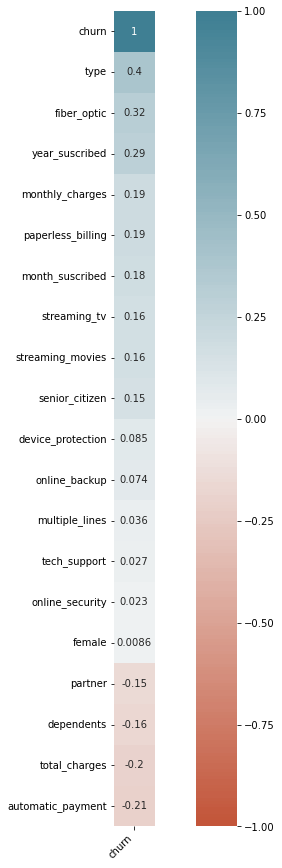

In [60]:
#plot correlation chart with the numerical features
corr = df.corr()
fig, ax = plt.subplots(figsize=(15,15))  
ax = sns.heatmap(
    corr[['churn']].sort_values(by='churn', ascending=False), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

The conclusions drawn from the chart are that the contract type (as labeled above) positively correlates to churn (in alignment to the hypothesis that long term contracts are expected to have a lower churn rate). Clients that have fiber optic instead of DSL also had a higher propensity to leave. Month_suscribed and year_suscribed are positively correlated to churn too, what means that older customers are more likely to stay, whereas the ones who unsuscribe tend to be recently added clients. 

Paperless_billing and monthly_charges have a positive correlation to churn as well (except that in a smaller measure), meaning that clients who are not sent their bill in paper had a higher churn rate, as well as those with greater monthly charges. Finally, seniority had a low but positive correlation, as well as streaming TV and movies (this can be due to users interested in such service moving to another provider, and can indicate that Interconnect needs to improve that cornerstone for fidelizing users interested in that service.)

On the counterside the ones who paid by automatic means had a lower churn rate, so the company should try and to pull clients to commit to this suscription, maybe offering a discount to people who have their service fee charged automatically. Total charges had a negative correlation to churn, following the same line as suscription date: the ones who were suscribed longer, most typically had higher total charges, and a lower churn rate.

Lastly, users who had dependants or a partner were less likely to quit, probably because there's one or more users at home who need to access the service.


#### Assess class imbalance

0    0.73463
1    0.26537
Name: churn, dtype: float64


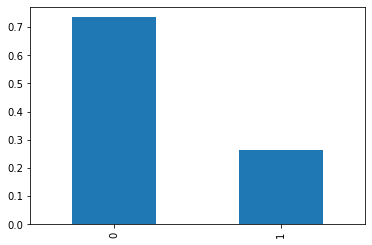

In [61]:
#Print and plot percentages of users who churned vs. those who didn't
class_frequency= df['churn'].value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar')
plt.show()

Users who churned are underepresented in the set. We will bear this in mind for building the work plan below.

## Stage 3. Work plan<a id='work_plan'></a>

### QUESTIONS

1) Do you agree with the approach applied to the gender and fiber_optic columns? (Changing "gender" by female and "InternetService" by "fiber_optic" and  and setting values to 1 (True) or (False) 

2) Is removing the end_date column and leaving the calculation of "days_suscribed" and "begin_date" (timestamp) instead a good way to go in your opinion?

3) As for "payment method", do you think it's ok to use label encoding/OHE as appropriate depending on the model type? i.e., as this feature is neither ordinal non binary, as "contract type" (natural order in the values) or gender/internet service.

4) What's your opinion regarding using a logistic regressor to fill out information about internet/phone plans from customers for whom we're missing this data?

5) Would you try out as many models as included in the work plan, or take some of them out for the sake of time-saving?

<div class="alert alert-success">
1) Yes, this is a good approach. Altenatively you could also set both columns to "not specified". This will not create bias towards "female" or "fiber_optic".
    
2) Yes, that is correct. Begin_date as timestamp will not be really good feature as it is almost always unique. I would recommend you to generate new features from it, e.g. begin_month or begin_quarter.
    
3) Depending on the model label encoding or OHE are both good. For linear regression OHE is a better aproach, for tree-based models I would recommend to go with label encoding (ordinal encoding)
    
4) I am not sure if it is needed here. Missing internet information probably means that this person does not use internet services. If you use logistic regression for imputation it means that you artificially create some service usage which is not the case in reality. I would recommend to replace with "not available" or something similar.
    
5) You can try building a couple of models, e.g. LinearRegression, RandomForest, XGBoost and if they are not strong enough you can try out some other models as well.
    
</div>

<div class="alert alert-info">
    
2) The change was implemented, now begin date was split into month_suscribed & year_suscribed.
    
4) Also put into place: now missing values were set to -1 (as the columns to be filled out were all binary).
    
    
</div>

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

Good job on data preprocessing! There's one unfortunate problem though. Using both contract duration (`days_suscribed`) together with either `begin_date` or its components (`month_suscribed` & `year_suscribed`) results in target leakage: it is easy to figure out the `end_date` and thus whether the customer churned or not using these two features. So you can leave either just contract duration, or `begin_date` to fix this problem.

</div>

<div class="alert alert-info">
Oh, right, then that was the issue. I see now, if I provide the model with the begin date + days suscribed, the end_date column can be calculated. And for every contract which end date is not 2020.02.01, churn is 1.
    
I removed days suscribed so now it should be solved.
</div>
  

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Yep, exactly!
    
Ok, although I'd probably drop the begin date and use days subscribed instead: how long someone has been a customer seems like a more relevant feature, although I can see that you've got excellent results with begin date too :)

</div>

<div class="alert alert-info">
 Tried this approach but the models performed slightly worse, so I kept up with begin month and year.
    
</div>
  

### Encoding categorical variable  <a id='encoding'></a>

#### Label encoding

In [62]:
#Label-encode categorical data
cat_col=[col for col in df.columns if df[col].dtype=='object' ]
encoder = OrdinalEncoder() 
encoder.fit(df[cat_col]) 
df_ord = pd.DataFrame(encoder.transform(df[cat_col]),columns=cat_col) 
df_ord.head()

,payment_method
0,2.0
1,3.0
2,3.0
3,0.0
4,2.0


In [63]:
#list with non categorical columns
non_cat_col=[col for col in df.columns if df[col].dtype!='object' ]

#join with non categorical columns
df_ord=df[non_cat_col].join( df_ord).copy()

#print first five rows
df_ord.head()

,type,paperless_billing,monthly_charges,total_charges,churn,automatic_payment,female,senior_citizen,partner,dependents,...,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,month_suscribed,year_suscribed,payment_method
0,3,1,29.85,29.85,0,0,1,0,1,0,...,0,1,0,0,0,0,-1,1,2020,2.0
1,2,0,56.95,1889.50,0,0,0,0,0,0,...,1,0,1,0,0,0,0,4,2017,3.0
2,3,1,53.85,108.15,1,0,0,0,0,0,...,1,1,0,0,0,0,0,10,2019,3.0
3,2,0,42.30,1840.75,0,1,0,0,0,0,...,1,0,1,1,0,0,-1,5,2016,0.0
4,3,1,70.70,151.65,1,0,1,0,0,0,...,0,0,0,0,0,0,0,9,2019,2.0


#### One-Hot encoding

In [64]:
#encode categorical variables using OHE (most suitable apporach for regression)
df_ohe = pd.get_dummies(df, drop_first=True)
df_ohe.head()


,type,paperless_billing,monthly_charges,total_charges,churn,automatic_payment,female,senior_citizen,partner,dependents,...,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,month_suscribed,year_suscribed,payment_method_Credit card,payment_method_Electronic check,payment_method_Mailed check
0,3,1,29.85,29.85,0,0,1,0,1,0,...,0,0,0,0,-1,1,2020,0,1,0
1,2,0,56.95,1889.50,0,0,0,0,0,0,...,1,0,0,0,0,4,2017,0,0,1
2,3,1,53.85,108.15,1,0,0,0,0,0,...,0,0,0,0,0,10,2019,0,0,1
3,2,0,42.30,1840.75,0,1,0,0,0,0,...,1,1,0,0,-1,5,2016,0,0,0
4,3,1,70.70,151.65,1,0,1,0,0,0,...,0,0,0,0,0,9,2019,0,1,0


<div class="alert alert-success">
<b>Reviewer's comment</b>

Ok, categorical features were encoded

</div>

### Split into train and test set and separate features from target <a id='split'></a>

In [65]:
def train_test (df):
    train_df, test_df = train_test_split(df, test_size=0.20, random_state=12345 )
    return  train_df, test_df

In [66]:
#Split datasets into train and test
train_OHE, test_OHE= train_test(df_ohe)
train_ord, test_ord= train_test(df_ord)


In [67]:
#separate features from target (as random state is fixed, both datsets will be split alike)
#so there's no need to store target separately

train_X_OHE= train_OHE.drop('churn', axis=1)
test_X_OHE= test_OHE.drop('churn', axis=1)
train_X_ord= train_ord.drop('churn', axis=1)
test_X_ord= test_ord.drop('churn', axis=1)
train_y= train_OHE['churn']
test_y=test_OHE['churn']

<div class="alert alert-success">
<b>Reviewer's comment</b>

The data was split into train and test
    

</div>

### Upsample the train set <a id='upsampling'></a>

**Upsampling: repeating the samples with the rarest class result (churn=1)**

Upsampling is performed in several steps:

- Split the training sample into negative and positive observations;

- Duplicate the positive observations several times;

- Create a new training sample based on the data obtained;

- Shuffle the data: identical questions following one another will not help the training.

In [68]:
#Define function to upsample the train set
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )
    
    return features_upsampled, target_upsampled

In [69]:
#upsample the train set

train_X_OHE_up, train_y_up = upsample(train_X_OHE, train_y,3)
train_X_ord_up, train_y_up = upsample(train_X_ord, train_y,3)


### Scale the features in the train and test set <a id='scaling'></a>

In [70]:
#scale the upsampled train features and the test features (OHE)
scaler = StandardScaler()
scaler.fit(train_X_OHE) 

train_X_OHE_up_scl= scaler.transform(train_X_OHE_up)
test_X_OHE_scl= scaler.transform(test_X_OHE)

In [71]:
#scale the upsampled train features and the test features (Label encoded)
scaler = StandardScaler()
scaler.fit(train_X_ord) 

train_X_ord_up_scl= scaler.transform(train_X_ord_up)
test_X_ord_scl= scaler.transform(test_X_ord)

<div class="alert alert-warning">
<b>Reviewer's comment</b>

Scaling is applied correctly for a simple case when we just train a model using the train set and evaluate it on the test set, but if you use cross-validation, it would be better to apply scaling in each fold separately (e.g. using [pipelines](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) or [imblearn pipelines](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html#imblearn.pipeline.Pipeline) if you also want upsampling)

</div>

<div class="alert alert-info">
  Perfect. Thanks for the warning, I've used the pipeline for tunning LightGBM and XGBooster hyperparameters, and a self-defined function for tree-based models.
    
</div>
  

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Awesome!

</div>

In [72]:
#define function to apply cross validation upsampling and scaling the data at each fold
def best_hyperparameters_cv (model, features, target, k_folds=4, repeat=3, scale=False):
    '''takes a model, train features and train target, together with the k_folds (4 by default) to be applied when
    cross-validating the model, and the nº of repetitions for the underpresented class to upscale (3 by default)
    If scale=True, the features will be scaled as well.'''
    
    features.reset_index(inplace=True, drop=True)
    target.reset_index(inplace=True, drop=True)
    
      
    
    sample_size= len(features)//k_folds
    
        
    scores=[]
    for i in range(0, len(features)-sample_size, sample_size):

        valid_indexes=range(i, i+sample_size)
        train_indexes=list(range(0,i))+list(range(i+sample_size, len(features))) 

        features_train = features.iloc[train_indexes]
        features_valid = features.iloc[valid_indexes]
        target_train = target.iloc[train_indexes]
        target_valid = target.iloc[valid_indexes]
        
        if scale:
            #scale the upsampled train features and the test feature
            scaler = StandardScaler()
            scaler.fit(features_train) 

            features_train = pd.DataFrame(scaler.transform(features_train), columns=features_train.columns, index=train_indexes)
            features_valid =  pd.DataFrame(scaler.transform(features_valid) , columns=features_train.columns, index=valid_indexes)

        features_train_up, target_train_up = upsample (features_train, target_train, repeat)



        model = model
        model = model.fit(features_train, target_train)

        #Store probabilities assigned by the model
        probabilities = model.predict_proba(features_valid)

        #Store probabilities of class "1" (churn)
        probabilities_one = probabilities[:, 1]

        score = roc_auc_score(target_valid,probabilities_one)
    
    scores.append(score)
    return sum(scores)/len(scores)

<div class="alert alert-warning">
<b>Reviewer's comment</b>

It's nice that you thought of upsampling to improve class balance (and it was correctly applied only to the train set). Note that for cross-validation, the correct approach (to avoid over-estimated cross-validation scores) is to apply upsampling in each fold separately. One way to achieve this is using imblearn library with its version of [pipelines](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html#imblearn.pipeline.Pipeline) and one of its [oversamplers](https://imbalanced-learn.org/stable/references/over_sampling.html)

</div>

<div class="alert alert-info">
  Perfect. Thanks for the warning, I've used the pipeline for tunning LightGBM and XGBooster hyperparameters, and a self-defined function for tree-based models.
    
</div>
  

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Wow, very cool! Both your implementation and your use of pipelines are correct! One thing for both your custom function and the pipeline: I would suggest first applying scaling and then upsampling (so that upsampling wouldn't influence the mean/standard deviation used for scaling)
    
BTW lightgbm and xgboost are also tree-based :)

</div>

<div class="alert alert-info">
1) I moved scaling one step behind (before upsampling) in my custom function (note that it's only set to True in KNN algorithm because I didn't try out hyperparameter tunning in logistic regression and scaling is not required in tree-based models).

Regarding this topic, I found the opposite advise when looking up for the best way to order upsampling and scaling steps:
    
[Link](https://datascience.stackexchange.com/questions/71515/should-i-scale-data-before-or-after-balancing-dataset)

"A general way to think about this process is in terms of learning and transformations. Scaling (standardization) is a transformation that you apply to every sample both in your training and test/validation/production set. These transformations are done using parameters that are learned using the training set. The aim of up/down sampling is to get a training set where you can better learn the parameters of your transformations - up/down sampling is not by itself a transformation. So, you usually first up/down sample your training set and then apply any scaling."
    
2) As you said XGBoost and LightGBM are also tree based, I removed the scaling step from the pipeline, trained and tested them on unscaled data, and used OHE instead of label encoding. This increased Light GBM score a bit.
    
However, initially I had used label encoding for LightGBM because of what I found [here](https://lightgbm.readthedocs.io/en/latest/Advanced-Topics.html#:~:text=treated%20as%20missing.-,Categorical%20Feature%20Support,to%20specify%20the%20categorical%20features.):

Categorical Feature Support

LightGBM offers good accuracy with integer-encoded categorical features. LightGBM applies Fisher (1958) to find the optimal split over categories as described here. This often performs better than one-hot encoding.

    
</div>
  

### Train and test different models and assess the AUC-ROC and accuracy achieved <a id='models'></a>

In [73]:
#write function to evaluate each model
def evaluate_model (target, predictions, prob_one):
    
    '''Takes the test target, predictions and probabilities
    calculated by an ML classifier and returns
    the AUC-ROC and accuracy achieved, plus a chart of the ROC Curve 
    as compared to a random model (auc-roc=0.5)'''
    
    auc_roc= roc_auc_score(target,prob_one)
    accuracy= accuracy_score(target, predictions)
    print(f'AUC-ROC: {round(auc_roc,2)}\n')
    print(f'Accuracy: {round(accuracy,2)}\n')
    
    fpr, tpr, thresh = roc_curve(target, predictions)

    plt.clf()
    # ROC curve for random model (looks like a straight line)
    plt.plot([0, 1], [0, 1], linestyle='--')

    # < plot the graph >
    plt.plot(fpr, tpr)

    # < use the functions plt.xlim() and plt.ylim() to
    #   set the boundary for the axes from 0 to 1 >
    plt.ylim([0.0, 1.0])
    plt.xlim([0.0, 1.0])

    # < use the functions plt.xlabel() and plt.ylabel() to
    #   name the axes "False Positive Rate" and "True Positive Rate" >


    plt.xlabel('FPR')
    plt.ylabel('TPR')

    # < add the heading "ROC curve" with the function plt.title() >
    plt.title('ROC curve')
    plt.show()

    
    return auc_roc, accuracy

#### Dummy model <a id='dummy'></a>

A baseline model is essentially a simple model that acts as a reference in a machine learning project. Its main function is to contextualize the results of trained models.

Baseline models usually lack complexity and may have little predictive power. Regardless, their inclusion is good practice, as they serve as benchmarks for trained models and improve understanding of the data.

In this case, the dummy model built below will predict the most frequent value found in the train target for every observation in the test set.

AUC-ROC: 0.5

Accuracy: 0.73



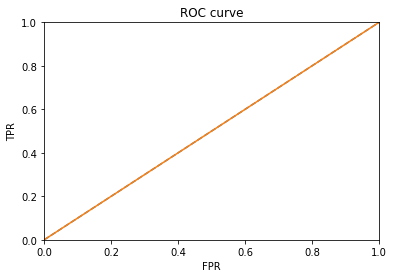

In [74]:
#Get AUC-ROC for a baseline model (as we said in the introduction, the AUC-ROC achieved by a random model is 0.5)
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(train_X_OHE, train_y)
pred_dummy= dummy_clf.predict(test_X_OHE)
prob_dummy= dummy_clf.predict_proba(test_X_OHE)

#Store probabilities of class "1" (churn)
probabilities_one_dummy = prob_dummy[:, 1]

#assess performance
dummy_auc_roc,dummy_accuracy= evaluate_model (test_y,pred_dummy, probabilities_one_dummy)


In [75]:
#check % of negative class in the test set
round(test_y.value_counts()/len(test_y)*100,2)

0    73.1
1    26.9
Name: churn, dtype: float64

As 0 accounts for the 73% of the values in the test target, a model predicting always 0 as an answer would achieve an accuracy of the 73%.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Right!

</div>

Basing our work in the dataset we've constructed above by merging and fixing the information provided by Interconnect in separte tables, we will train and test diferent classification models in order to select the one that performs the best and use it in the future to prevent clients from leaving by offering them promotional codes and special plan options.

The primary metric we'll base our decision on is AUC-ROC. We will also get the accuracy of each model as a secondary assessment.

**AUC-ROC (Area Under Curve-Receiver Operating Characteristic)**

The ROC curve can be plotted by putting the false positive rate values (FPR) along the horizontal axis, and true positive rate values (TPR) along the vertical axis. Then we iterate over the logistic regression threshold values (the value starting from which the predicted value will be set as 1=True) and plot a curve. 

For a model that always answers randomly, the ROC curve is a diagonal line going from the lower left to the upper right. The higher the curve, the greater the TPR value and the better the model's quality.


The AUC-ROC value will allow us to find how much our model differs from the random model. Its values are always in the range from 0 to 1. The AUC-ROC value for a random model is 0.5.

**Accuracy**

Accuracy is the ratio of the number of correct answers to the total number of questions (i.e. the test dataset size).



#### Logistic regression<a id='logistic'></a>

AUC-ROC: 0.85

Accuracy: 0.74



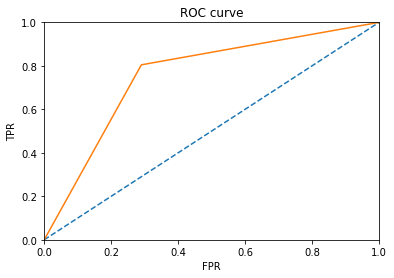

In [76]:
#Create regression model
model_regression= LogisticRegression(random_state=12345, solver='liblinear')

#Train regression model w/ OHE upsampled and scaled features
model_regression.fit(train_X_OHE_up_scl, train_y_up)

#Store predictions
predictions_linear = model_regression.predict(test_X_OHE_scl)

#Store probabilities assigned by the model
probabilities_linear = model_regression.predict_proba(test_X_OHE_scl)

#Store probabilities of class "1" (churn)
probabilities_one_linear = probabilities_linear[:, 1]


#evaluate model performance
logistic_auc_roc,logistic_accuracy= evaluate_model (test_y, predictions_linear,probabilities_one_linear )

#### Desicion tree <a id='tree'></a>

In [77]:
#Select the best hyperparameters for the decision tree classifier using cross validation on the train set
model_tree = None
best_result_tree = 0



for depth in range(1,10): # choose hyperparameter range
    model = DecisionTreeClassifier(random_state=12345, max_depth= depth) # train model on training set
    mean_score = best_hyperparameters_cv (model, train_X_ord, train_y , k_folds=4, repeat=3, scale=False)
    if mean_score > best_result_tree:
        model_tree=model
        best_result_tree=mean_score
        
#print the hyperparameters of the best-performing model
print(model_tree, best_result_tree)

DecisionTreeClassifier(max_depth=6, random_state=12345) 0.8400606187290972


AUC-ROC: 0.87

Accuracy: 0.75



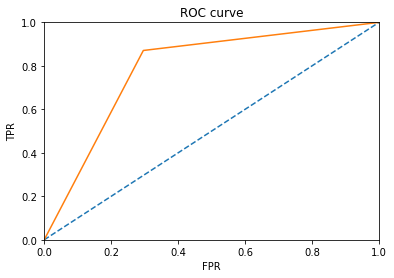

In [78]:
#evaluate the quality of the model on the test set
model_tree.fit(train_X_ord_up_scl,train_y_up )


#Store predictions
predictions_tree = model_tree.predict(test_X_ord_scl)

#Store probabilities assigned by the model
probabilities_tree = model_tree.predict_proba(test_X_ord_scl)

#Store probabilities of class "1" (churn)
probabilities_one_tree = probabilities_tree[:, 1]


#evaluate model performance
tree_auc_roc,tree_accuracy= evaluate_model (test_y, predictions_tree,probabilities_one_tree )


#### Random Forest <a id='forest'></a>

In [79]:
#Select the best hyperparameters for the Random Forest classifier using cross validation on the train set
model_forest = None
best_result_forest = 0


for est in range(40, 51, 10):
    for depth in range(1,10): # choose hyperparameter range
        model = RandomForestClassifier(random_state=12345, max_depth= depth,n_estimators=est)
        mean_score =  best_hyperparameters_cv (model, train_X_ord, train_y , k_folds=4, repeat=3, scale=False)
        if mean_score > best_result_forest:
            model_forest=model
            best_result_forest=mean_score

print(model_forest, best_result_forest)

RandomForestClassifier(max_depth=9, n_estimators=40, random_state=12345) 0.85856239548495


AUC-ROC: 0.88

Accuracy: 0.79



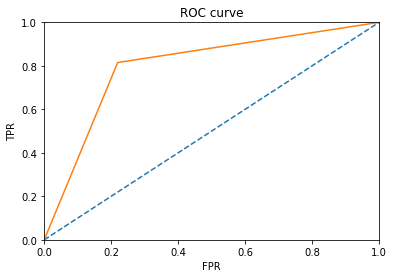

In [80]:
#evaluate the quality of the model on the test set
model_forest.fit(train_X_ord_up_scl,train_y_up )


#Store predictions
predictions_forest = model_forest.predict(test_X_ord_scl)

#Store probabilities assigned by the model
probabilities_forest = model_forest.predict_proba(test_X_ord_scl)

#Store probabilities of class "1" (churn)
probabilities_one_forest = probabilities_forest[:, 1]


#evaluate model performance
forest_auc_roc,forest_accuracy= evaluate_model (test_y, predictions_forest,probabilities_one_forest )


#### KNN Classifier <a id='knn'></a>

In [81]:
model_knn=None
best_result_knn=0

for n in range(1,20):
    model = KNeighborsClassifier(n_neighbors=n)
    mean_score = best_hyperparameters_cv (model, train_X_OHE, train_y , k_folds=4, repeat=3, scale=True)
    if mean_score > best_result_knn:
        best_result_knn=mean_score
        model_knn= model

print(model_knn, best_result_knn)   

KNeighborsClassifier(n_neighbors=19) 0.808145641722408


AUC-ROC: 0.81

Accuracy: 0.7



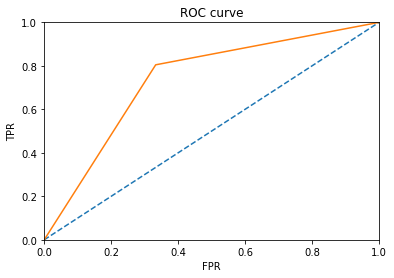

In [82]:
#evaluate the quality of the model on the test set
model_knn.fit(train_X_OHE_up_scl,train_y_up )

#Store predictions
predictions_knn= model_knn.predict(test_X_OHE_scl)

#Store probabilities assigned by the model
probabilities_knn = model_knn.predict_proba(test_X_OHE_scl)

#Store probabilities of class "1" (churn)
probabilities_one_knn = probabilities_knn[:, 1]


#evaluate model performance
knn_auc_roc,knn_accuracy= evaluate_model (test_y, predictions_knn,probabilities_one_knn )


#### Light GBM <a id='lgbm'></a>

In [83]:
#initialize model


param_test ={'lgb__num_leaves': (6, 10, 50), 
             'lgb__min_child_samples': (100,200,500), 
             'lgb__min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'lgb__reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'lgb__reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}


In [84]:


pipeline = imbpipeline(steps = [
                                ['smote', SMOTE(random_state=12345)],
                                
                                ['lgb', lgb.LGBMClassifier(max_depth=-1, random_state=12345, metric='None', n_jobs=4, n_estimators=5000) ]])

cv = RandomizedSearchCV(pipeline, cv=4, param_distributions=param_test, scoring='roc_auc')

In [85]:
#cv.fit(train_X_OHE,train_y)
#print("Best parameters:", cv.best_params_)
#print("Highest Auc-Roc: ", (cv.best_score_))

Best parameters: {'lgb__reg_lambda': 50, 'lgb__reg_alpha': 2, 'lgb__num_leaves': 50, 'lgb__min_child_weight': 0.01, 'lgb__min_child_samples': 500}
Highest Auc-Roc:  0.9330499419914471

In [86]:
opt_parameters_lgb= {'reg_lambda': 50, 'reg_alpha': 2, 'num_leaves': 50, 'min_child_weight': 0.01, 'min_child_samples': 500}
model_lgb = lgb.LGBMClassifier(max_depth=-1, random_state=12345, metric='None', n_jobs=4, n_estimators=5000,**opt_parameters_lgb)


AUC-ROC: 0.94

Accuracy: 0.89



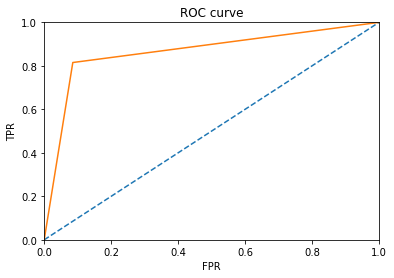

In [87]:
model_lgb.fit(train_X_OHE_up, train_y_up)

predictions_lgb= model_lgb.predict(test_X_OHE)

#Store probabilities assigned by the model
probabilities_lgb = model_lgb.predict_proba(test_X_OHE)

#Store probabilities of class "1" (churn)
probabilities_one_lgb = probabilities_lgb[:, 1]


#evaluate model performance
lgbm_auc_roc,lgbm_accuracy= evaluate_model (test_y, predictions_lgb,probabilities_one_lgb )


#### XGBooster <a id='xgb'></a>

In [88]:
params = { 'xgb__max_depth': [3, 5, 6, 10, 15, 20],
          'xgb__learning_rate': [0.01, 0.1, 0.2, 0.3],
        'xgb__subsample': np.arange(0.5, 1.0, 0.1),
      'xgb__colsample_bytree': np.arange(0.4, 1.0, 0.1),
     'xgb__colsample_bylevel': np.arange(0.4, 1.0, 0.1)
        }




pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=12345)],
                              
                              ['xgb',  xgb.XGBClassifier(seed =12345,use_label_encoder=False,eval_metric='auc')]])


clf_xgb = RandomizedSearchCV(pipeline,
                         param_distributions=params,
                       scoring='roc_auc',
                      n_iter=5,
                       verbose=1, cv=4)
clf_xgb.fit(train_X_OHE,train_y)
print("Best parameters:", clf_xgb.best_params_)
print("Highest Auc-Roc: ", (clf_xgb.best_score_))

Fitting 4 folds for each of 5 candidates, totalling 20 fits
Best parameters: {'xgb__subsample': 0.8999999999999999, 'xgb__max_depth': 6, 'xgb__learning_rate': 0.3, 'xgb__colsample_bytree': 0.6, 'xgb__colsample_bylevel': 0.7999999999999999}
Highest Auc-Roc:  0.8949841179082617


Fitting 4 folds for each of 5 candidates, totalling 20 fits
Best parameters: {'xgb__subsample': 0.7, 'xgb__max_depth': 20, 'xgb__learning_rate': 0.3, 'xgb__colsample_bytree': 0.7999999999999999, 'xgb__colsample_bylevel': 0.5}
Highest Auc-Roc:  0.8910253409612896

AUC-ROC: 0.91

Accuracy: 0.87



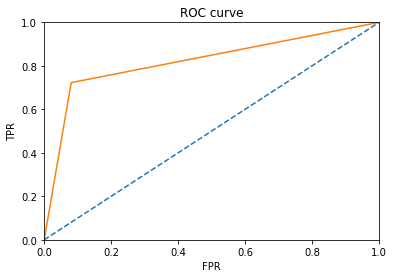

In [89]:
opt_parameters_xgb={'subsample': 0.6, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 0.8999999999999999, 'colsample_bylevel': 0.6} 
model_xgb = xgb.XGBClassifier(random_state=12345,**opt_parameters_xgb,use_label_encoder=False, eval_metric='auc')

#evaluate the quality of the model on the test set
model_xgb.fit(train_X_OHE_up,train_y_up )

#Store predictions
predictions_xgb= model_xgb.predict(test_X_OHE)

#Store probabilities assigned by the model
probabilities_xgb = model_xgb.predict_proba(test_X_OHE)

#Store probabilities of class "1" (churn)
probabilities_one_xgb = probabilities_xgb[:, 1]


#evaluate model performance
xgb_auc_roc,xgb_accuracy= evaluate_model (test_y, predictions_xgb,probabilities_one_xgb )



#### Conclusion:

The best performing models was Light GBM with an AUC-ROC of 0.94 on the test set, and an accuracy of the 89%

Further explanations will be included in the final report once the code is validated.

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

Awesome, you tried various different models and tuned their hyperparameters using cross-validation. But due to the target leakage problem, unfortunately we can't trust these metrics. By the way, if you ever encounter perfect or close to perfect scores with your models, it is almost always a sign of target leakage.

</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Excellent work! The code is accepted now. Based on your best model's ROC-AUC, you've got 6 SP. Congratulations!

</div>

## Comments on Review V2

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Yep, exactly!
    
Ok, although I'd probably drop the begin date and use days subscribed instead: how long someone has been a customer seems like a more relevant feature, although I can see that you've got excellent results with begin date too :)

</div>

<div class="alert alert-info">
 Tried this approach but the models performed slightly worse, so I kept up with begin month and year.
    
</div>
  

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Wow, very cool! Both your implementation and your use of pipelines are correct! One thing for both your custom function and the pipeline: I would suggest first applying scaling and then upsampling (so that upsampling wouldn't influence the mean/standard deviation used for scaling)
    
BTW lightgbm and xgboost are also tree-based :)

</div>

<div class="alert alert-info">
1) I moved scaling one step behind (before upsampling) in my custom function (note that it's only set to True in KNN algorithm because I didn't try out hyperparameter tunning in logistic regression and scaling is not required in tree-based models).

Regarding this topic, I found the opposite advise when looking up for the best way to order upsampling and scaling steps:
    
[Link](https://datascience.stackexchange.com/questions/71515/should-i-scale-data-before-or-after-balancing-dataset)

"A general way to think about this process is in terms of learning and transformations. Scaling (standardization) is a transformation that you apply to every sample both in your training and test/validation/production set. These transformations are done using parameters that are learned using the training set. The aim of up/down sampling is to get a training set where you can better learn the parameters of your transformations - up/down sampling is not by itself a transformation. So, you usually first up/down sample your training set and then apply any scaling."
    
2) As you said XGBoost and LightGBM are also tree based, I removed the scaling step from the pipeline, trained and tested them on unscaled data, and used OHE instead of label encoding. This increased Light GBM score a bit.
    
However, initially I had used label encoding for LightGBM because of what I found [here](https://lightgbm.readthedocs.io/en/latest/Advanced-Topics.html#:~:text=treated%20as%20missing.-,Categorical%20Feature%20Support,to%20specify%20the%20categorical%20features.):

Categorical Feature Support

LightGBM offers good accuracy with integer-encoded categorical features. LightGBM applies Fisher (1958) to find the optimal split over categories as described here. This often performs better than one-hot encoding.

    
</div>
  

In [90]:
#Create a dataframe with results


table_comp = pd.DataFrame({
                          'Logistic regression': [round(logistic_auc_roc,2)],
                          'Decision tree classifier': [round(tree_auc_roc,2)],
                          'Random forest classifier':[round(forest_auc_roc,2)],
                          'KNearestNeighbors ':[round(knn_auc_roc,2)],
                          'LightGBM ':[round(lgbm_auc_roc,2)],
                          'XGBoost': [round(xgb_auc_roc,2)]
                          }).T
table_comp=table_comp.rename(columns={0:'AUC-ROC on test set'})
#sort by rmse in ascending order
table_comp= table_comp.sort_values(by=['AUC-ROC on test set'],ascending=True)
#print
table_comp
table_comp







,AUC-ROC on test set
KNearestNeighbors,0.81
Logistic regression,0.85
Decision tree classifier,0.87
Random forest classifier,0.88
XGBoost,0.91
LightGBM,0.94


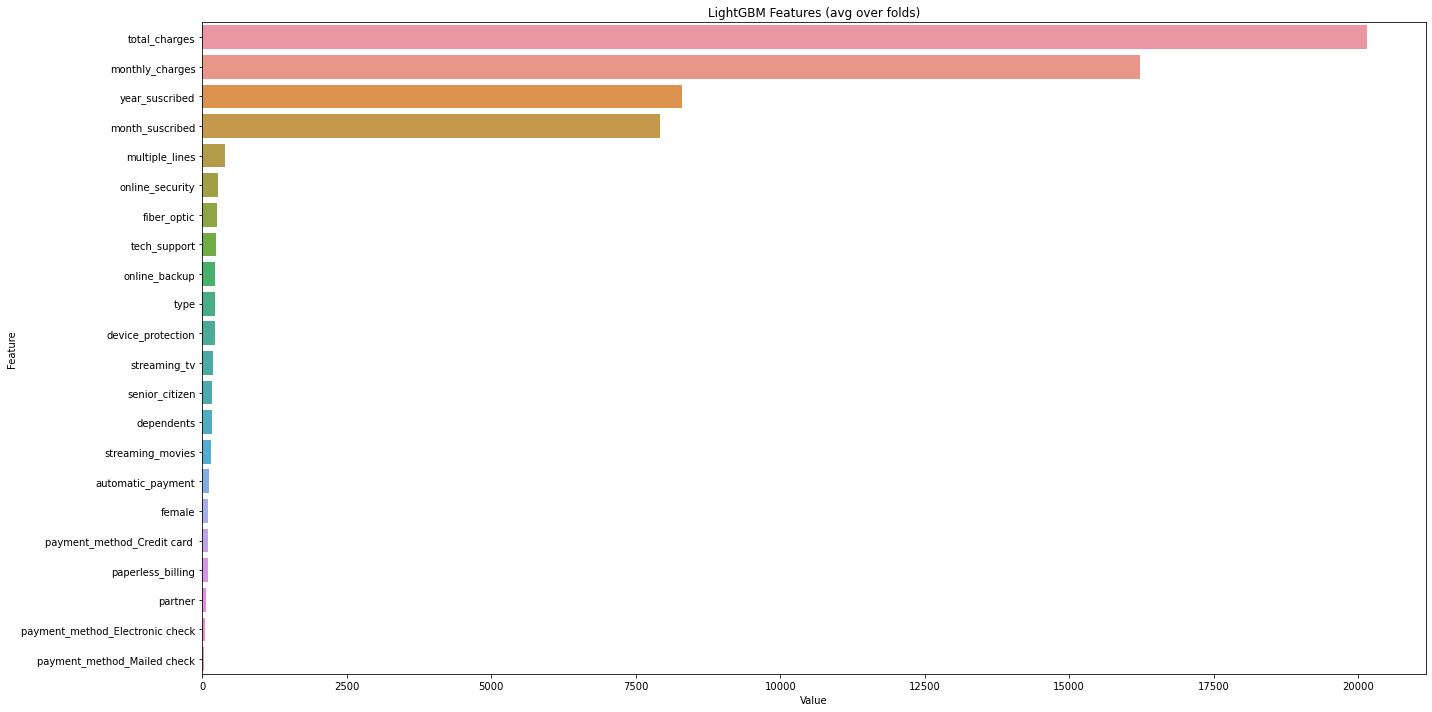

In [91]:
# Print feature importance assigned by the best performing model
feature_imp = pd.DataFrame(sorted(zip(model_lgb.feature_importances_,train_X_OHE.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()


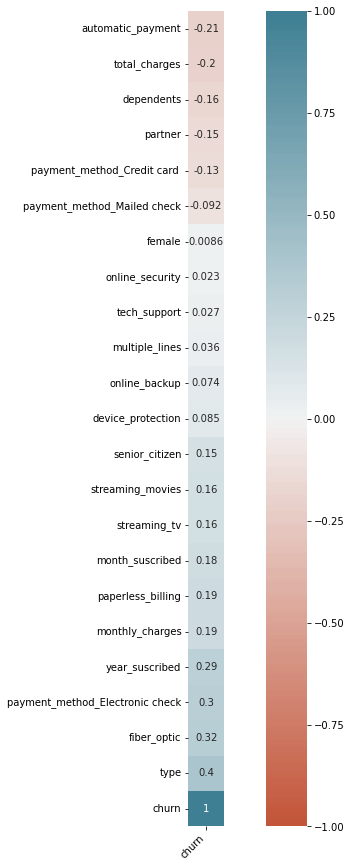

In [93]:
#plot correlation chart for one-hot encoded dataframe
corr = df_OHE.corr().sort_values(by='churn')
fig, ax = plt.subplots(figsize=(15,15))  
ax = sns.heatmap(
    corr[['churn']], 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()


# Report - Overall Summary

## Objective

The main goal of this project is to allow telecom operator to forecast their churn of clients. If it's discovered that a user is planning to leave, they will be offered promotional codes and special plan options. 

## Data preparation

Interconnect's marketing team has collected some of their clientele's personal data, including information about their plans and contracts. After importing the data and getting an overall view of the sets, we performed some formatting fixes, and :

- Split begin date into month_suscribed and year_suscribed.
- Calculated "churn" column, depending on whether end_date was "no" (churn=0) or a specific date (churn=1).
- Labeled encoded contract type, following the natural order of variables: "Month-to-Month"=3, "One year"=2 and "Two year"=1 (as correlated to churn= 1 or 0).
- Added a column set to 1 if the payment method contained the word "automatic" or to 0 otherwise.
- Converted every other categorical column to binary, except for payment method. Total charges had some incorrect values that were fixed, and then it was turned into float.
- Merged the customer's personal data to contracts information, as well as to the data available on phone and internet plans hired by each client. Whenever a client was missing information either on their phone plan or their internet plan, we filled it out with -1, to indicate that they actually didn't count on such service.
- Dropped out the "begin date", "end date" and customer id columns.


Next, we plotted a heatmap to assess linear correlation between individual features and the target (churn), arriving to the following conclusions:

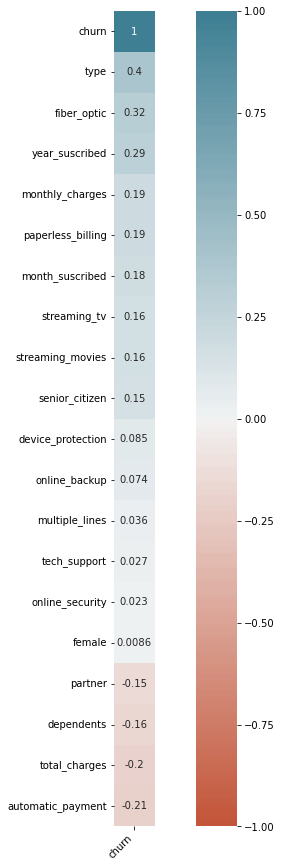

The contract type (as labeled above) positively correlates to churn (in alignment to the hypothesis that long term contracts are expected to have a lower churn rate). Clients that have fiber optic instead of DSL also had a higher propensity to leave. Month_suscribed and year_suscribed are positively correlated to churn too, what means that older customers are more likely to stay, whereas the ones who unsuscribe tend to be recently added clients. 

Paperless_billing and monthly_charges have a positive correlation to churn as well (except that in a smaller measure), meaning that clients who are not sent their bill in paper had a higher churn rate, as well as those with greater monthly charges. Finally, seniority had a low but positive correlation, as well as streaming TV and movies (this can be due to users interested in such service moving to another provider, and can indicate that Interconnect needs to improve that cornerstone for fidelizing users interested in that service.)

On the counterside the ones who paid by automatic means had a lower churn rate, so the company should try and to pull clients to commit to this suscription, maybe offering a discount to people who have their service fee charged automatically. Total charges had a negative correlation to churn, following the same line as suscription date: the ones who were suscribed longer, most typically had higher total charges, and a lower churn rate.

Lastly, users who had dependants or a partner were less likely to quit, probably because there's one or more users at home who need to access the service.



## Model training and testing


## Class imabalance
Since we've managed to convert this task into a classification problem, we proceeded to assess class imbalance before deciding on a detailed work plan:

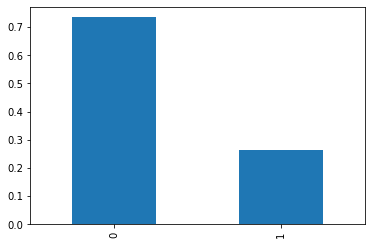

Users who churned are underepresented in the set. We will bear this in mind for building the work plan below.


## Work plan

The steps followed to tune, train and test different classification models were:

[1) Encode the unique categorical feature as most suitable for each model (OHE/label encoding).](#encoding)

[2) Split the dataset into train and test applying a 4:1 ratio, and store features and target separately.](#split)

[3) Fix the target class imbalance applying upsampling.](#upsampling)

[4) Scale the features in the train set for the regression and KNN models.](#scaling)

[5) Train the following models trying different hyperparameters and using cross-validation to select the best performing ones, and assessing their performance on the test set:](#models)

- [Dummy model (baseline): a model predicting a constant value.](#dummy)

     The AUC-ROC was 0.5, as supposed to be for the random model. Its accuracy was of the 73%, as 0 accounts for the 73% of the values in the test target.

- [Logistic Regression](#logistic)
- [Decision Tree Classifier](#tree)
- [Random Forest Classifier](#forest)
- [KNearest Neighbors Classifier](#knn)
- [Light GBM Classifier](#lgbm)
- [XGBoost Classifier](#xgb)

For all the models where we used cross-validation for tuning hyperparameters, the train data was scaled and upsampled at each fold.

6) Test performance on the test set assessing the AUC-ROC metric and the accuracy of the predictions.

## Results:

The AUC-ROC achieved by each model on the test set was as follows:


KNearestNeighbors	0.81

Logistic regression	0.85

Decision tree classifier	0.87

Random forest classifier	0.88

XGBoost	0.91

LightGBM	0.94


The best performing model was Light GBM, both on terms of AUC-ROC and accuracy (89%). Hence, we will put it into place for the company to try to predict whether a given set of customers is at risk of churning, in order to offer special retaining conditios to those who are classified as such by the model.

## Suggestions

The features that were deemed as more relevant to predict churn by the best performing model were:

- Total charges.
- Monthly charges.
- Year suscribed.
- Month suscribed.

This means that those are the key drivers for predicting churn, and the points it's worth focusing on to decide who to offer special conditions to.

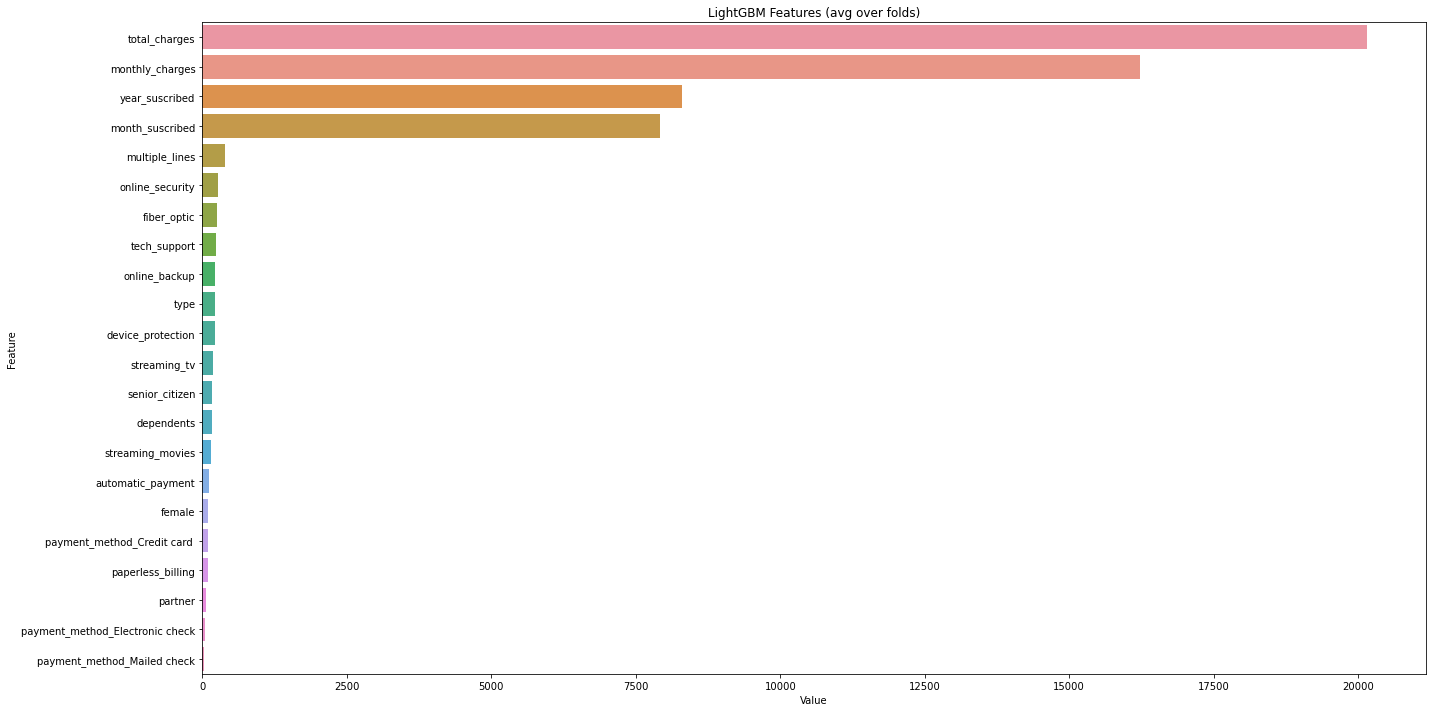


As for the features correlation to target, we got the following chart:

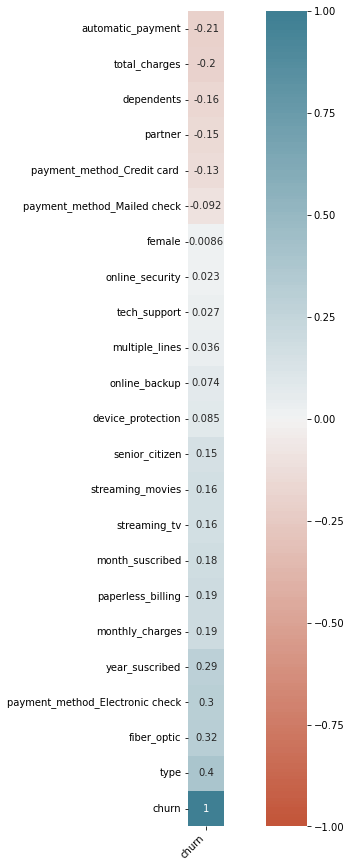


Since monthly charges have a negative correlation to churn, we know that total charges is only positively correlated to it due to the fact that customers that the longest a customer has been suscribed, the more likely they are to stay (which is deducted from the positivel correlation between month_suscribed and year_suscribed to churn).

Hence, we can tell from that conclusion that offering customers who are predicted to be about to churn a discount on their monthly fee is a good way to prevent them from leaving.

Based on the correlation plot, we can also suggest the company to:

- Incentive such clients to change to longer time contract types if they are in a month-to-month or one-year term contracts.

- Offer them to start receiving their bill by email (paperless billing seems to avoing over-checking on the detailed charges).

- If they're suscribed to an internet plan, offer a free trial of DSL to those using fiber optic.

- Try and pull them to start using automatic payment means if they still aren't, especially in case they currently use electronic checks. 

Below, we will take a look at how the churns predicted by the model lower down when applying the suggested changed to everyone in the test set:




In [94]:
#print % of users from the test set who were predicted as potential churns by the model
print(f'The {int(predictions_lgb.mean()*100)}% of the clients in the test set were predicted as likely to churn by the Light GBM model')

The 28% of the clients in the test set were predicted as likely to churn by the Light GBM model


In [95]:
#print % of real users from the test set who churned

print(f'The {int(test_y.mean()*100)}% of the clients in the test set had actually churned')

The 26% of the clients in the test set had actually churned


For assessing the forecasted effects of the proposed change in the predicted churn rate, we will work on the assumption that every customer on the test set predicted to be prone to churn by the Light GBM model:

1) Agreed to suscribe to a two-year contract type.

2) Accepted a 10% discount on their monthly charges (we won't modify total charges proportionally because the model will detect them as old-time customers even if they aren't just because of having lower total charges. Besides, the discount will be applied in the future and not retrospectively).

3) Changed fiber optic to DSL in the event that they had an internet plan in place.

4) Changed payment method from electronic or mailed check to credit card (automatic mean).

5) Agreed to start receiving their bills by email if they still weren't.

In [96]:
# Create a new dataframe as a copy of test_X_OHE df
test_X_OHE.reset_index(inplace=True, drop=True)

test_y.reset_index(inplace=True, drop=True)

test_X_OHE_promo=test_X_OHE.copy()

In [97]:
# Turn array predicted by Light GBM model into pandas series format
pred_lgb=pd.Series(predictions_lgb)

# Store indexes where predicted value=1
churn_idx= pred_lgb[pred_lgb==1].index

In [98]:
#For rows corresponding to clients that were predicted as likely to churn

#Reduce monthly charges by a 10%
test_X_OHE_promo.loc[churn_idx,'monthly_charges']=test_X_OHE_promo ['monthly_charges'].apply(lambda x: round(x*0.90,2))

#Change paperless billing to 1 (yes)
test_X_OHE_promo.loc[churn_idx,'paperless_billing']= 1

#Change rows where fiber optic is 1 to 0 (if it's -1, leave it as is)
test_X_OHE_promo.loc [churn_idx,'fiber_optic']=test_X_OHE_promo.apply(lambda x: 0 if x['fiber_optic']==1 else x, axis=1)

#Change contract type to 1 (two-year contract)
test_X_OHE_promo.loc [churn_idx,'type']=1

#Change rows where electronic check or mailed check is 1 to 1 in credit card (suppose they switched to credit card as payment method)
test_X_OHE_promo.loc [churn_idx,'payment_method_Credit card '] = test_X_OHE_promo.apply(lambda x: 1 if (x['payment_method_Credit card ']==1 or x['payment_method_Electronic check']==1 or x['payment_method_Mailed check']==1 )else 0, axis=1)

#Change rows where electronic check is 1 to 0
test_X_OHE_promo.loc [churn_idx,'payment_method_Electronic check']=0


#Change rows where mailed check is 1 to 0
test_X_OHE_promo.loc[churn_idx,'payment_method_Mailed check']= 0

#Change automatic payment to 1 in every row (either they switched to credit card or were paying by bank transfer )
test_X_OHE_promo.loc[churn_idx,'automatic_payment']=1

In [99]:
#make new predictions with the modified features
predictions_offer_applied= model_lgb.predict(test_X_OHE_promo)


In [100]:
#print % of users likely to churn from the test set who churned

print(f'The {int(predictions_offer_applied.mean()*100)}% of the clients in the test set would have been predicted as a potential churn if the suggested offer was put into place and accepted by every client previously predicted to churn')

The 8% of the clients in the test set would have been predicted as a potential churn if the suggested offer was put into place and accepted by every client previously predicted to churn


## Conclusion

The acceptance of the proposed incentives to all customers who were predicted to churn by the Light GBM model would result in a reduction of the 20% (from the 28% to the 8%) in the churn rate predicted.